In [6]:
import pandas as pd
import geopandas as gpd
#import hvplot.pandas  # noqa

#import cartopy.crs as ccrs

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
file = "govhack_latest/govhack2021-main/react-app/src/data/australia_postcode_bonds.json"

In [30]:
df = gpd.read_file(file)

In [31]:
df

,Postcode,Year,Month,# of Bonds,SQKM,SA_NAME_2011_list,geometry
0,2000,2018,4,318,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8..."
1,2000,2019,4,472,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8..."
2,2000,2020,4,353,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8..."
3,2000,2021,4,464,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8..."
4,2000,2018,8,504,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8..."
...,...,...,...,...,...,...,...
23038,2661,2018,3,1,19.924728,Wagga Wagga - South-Wagga Wagga - West-Wagga W...,"POLYGON ((147.24645 -35.15105, 147.25634 -35.1..."
23039,2661,2019,10,1,19.924728,Wagga Wagga - South-Wagga Wagga - West-Wagga W...,"POLYGON ((147.24645 -35.15105, 147.25634 -35.1..."
23040,2602,2018,3,1,22.782861,Ainslie-Dickson-Downer-Hackett-Lyneham-O'Conno...,"POLYGON ((149.08932 -35.25700, 149.11321 -35.2..."
23041,2614,2018,3,1,11.249565,Aranda-Cook-Florey-Hawker-Macquarie-Page-Scull...,"POLYGON ((149.05793 -35.23593, 149.06592 -35.2..."


In [36]:
#df.Month = pd.to_datetime(df.Month, format='%B').dt.month
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [32]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [51]:
df

,Postcode,Year,Month,# of Bonds,SQKM,SA_NAME_2011_list,geometry,Date
0,2000,2018,4,318,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8...",2018-04-01
1,2000,2019,4,472,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8...",2019-04-01
2,2000,2020,4,353,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8...",2020-04-01
3,2000,2021,4,464,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8...",2021-04-01
4,2000,2018,8,504,4.279443,Sydney - Haymarket - The Rocks,"POLYGON ((151.22000 -33.86592, 151.19829 -33.8...",2018-08-01
...,...,...,...,...,...,...,...,...
23038,2661,2018,3,1,19.924728,Wagga Wagga - South-Wagga Wagga - West-Wagga W...,"POLYGON ((147.24645 -35.15105, 147.25634 -35.1...",2018-03-01
23039,2661,2019,10,1,19.924728,Wagga Wagga - South-Wagga Wagga - West-Wagga W...,"POLYGON ((147.24645 -35.15105, 147.25634 -35.1...",2019-10-01
23040,2602,2018,3,1,22.782861,Ainslie-Dickson-Downer-Hackett-Lyneham-O'Conno...,"POLYGON ((149.08932 -35.25700, 149.11321 -35.2...",2018-03-01
23041,2614,2018,3,1,11.249565,Aranda-Cook-Florey-Hawker-Macquarie-Page-Scull...,"POLYGON ((149.05793 -35.23593, 149.06592 -35.2...",2018-03-01


In [44]:
df.groupby(['Postcode', 'Year']).sum()

Month  # of Bonds           SQKM
Postcode Year                                  
2000     2018     78        4920      51.353320
         2019     78        6405      51.353320
         2020     78        7221      51.353320
         2021     28        3404      29.956104
2006     2018      6           1       0.726411
...              ...         ...            ...
2880     2021     28         325  653572.209770
2898     2018     13           2      32.584062
         2019      3           2      32.584062
         2020      2           1      16.292031
         2021      1           1      16.292031

[2377 rows x 3 columns]

In [46]:
mean_bonds_per_year = df.groupby(['Postcode', 'Year']).mean()

In [47]:
mean_bonds_per_year.reset_index(inplace=True)

In [48]:
mean_bonds_per_year_geo = pd.merge(mean_bonds_per_year, df[['Postcode', 'geometry']], left_on="Postcode", right_on="Postcode")

## Mean Rental Bond Data per Year across Suburbs

### 2018

<AxesSubplot:>

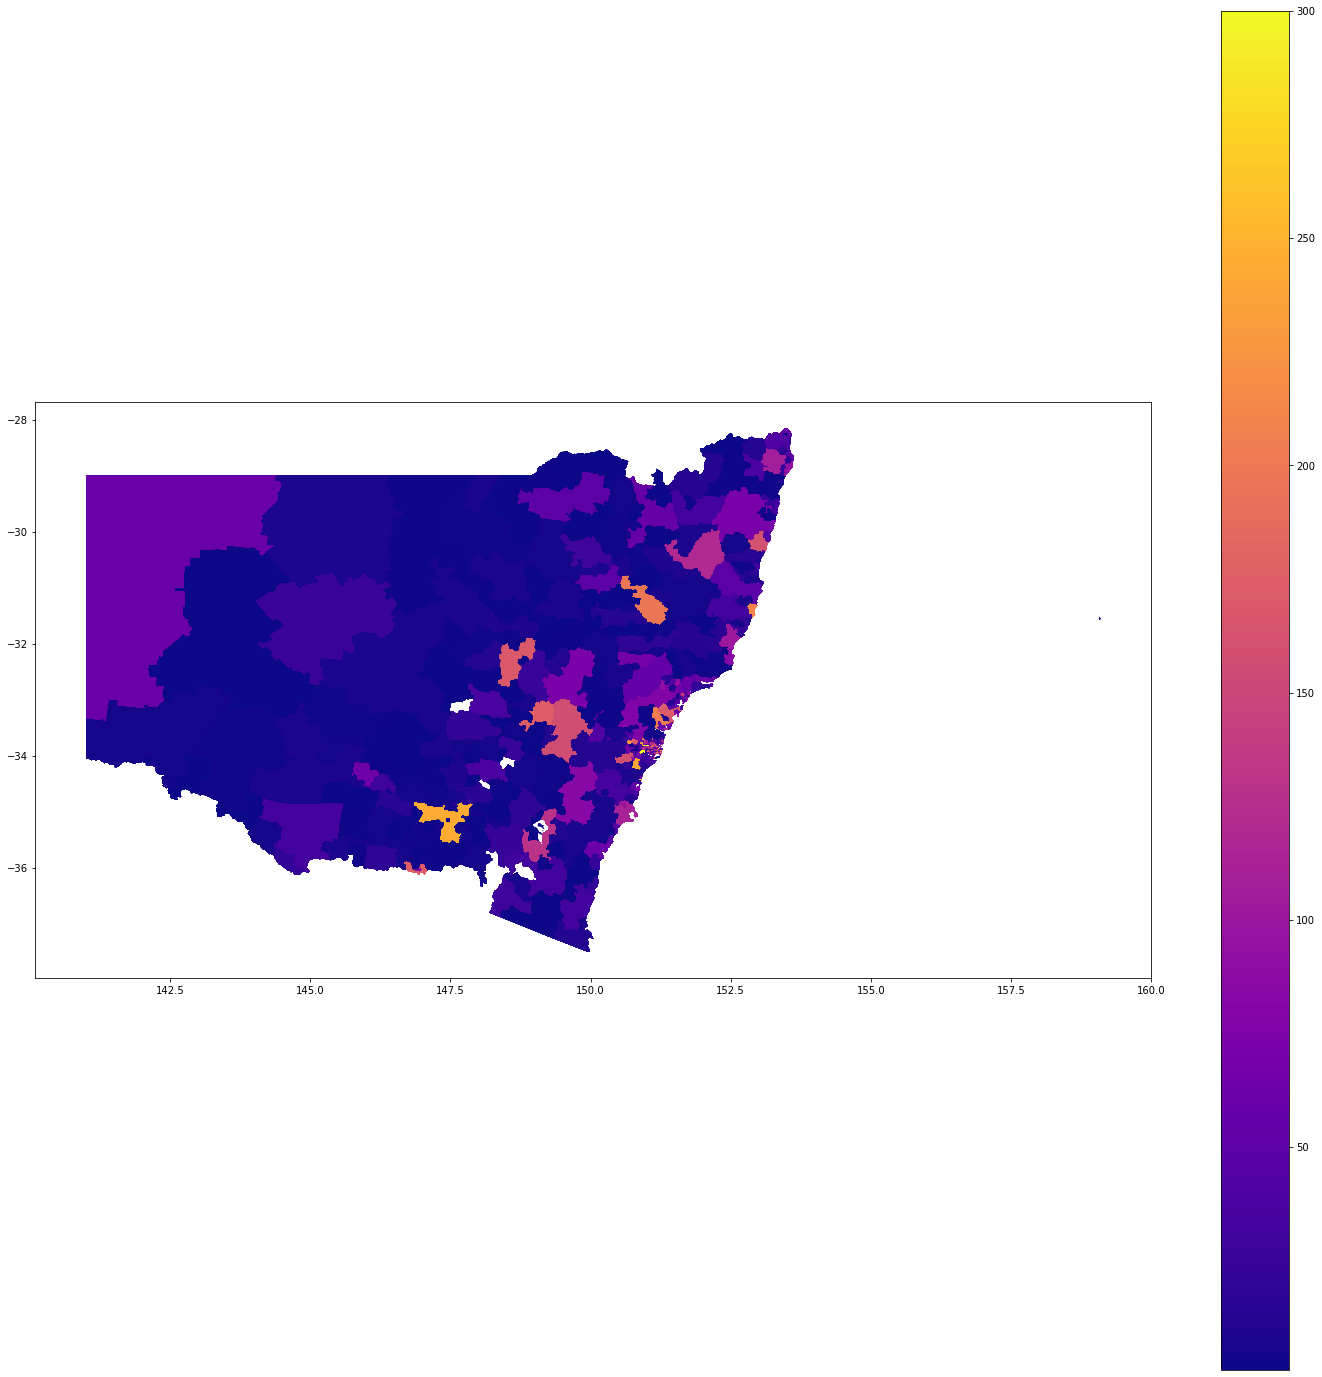

In [61]:
mean_bonds_per_year_geo[mean_bonds_per_year_geo['Year']==2018].plot(column="# of Bonds", figsize=(25,25), cmap='plasma', legend=True, vmax=300)

### 2019

<AxesSubplot:>

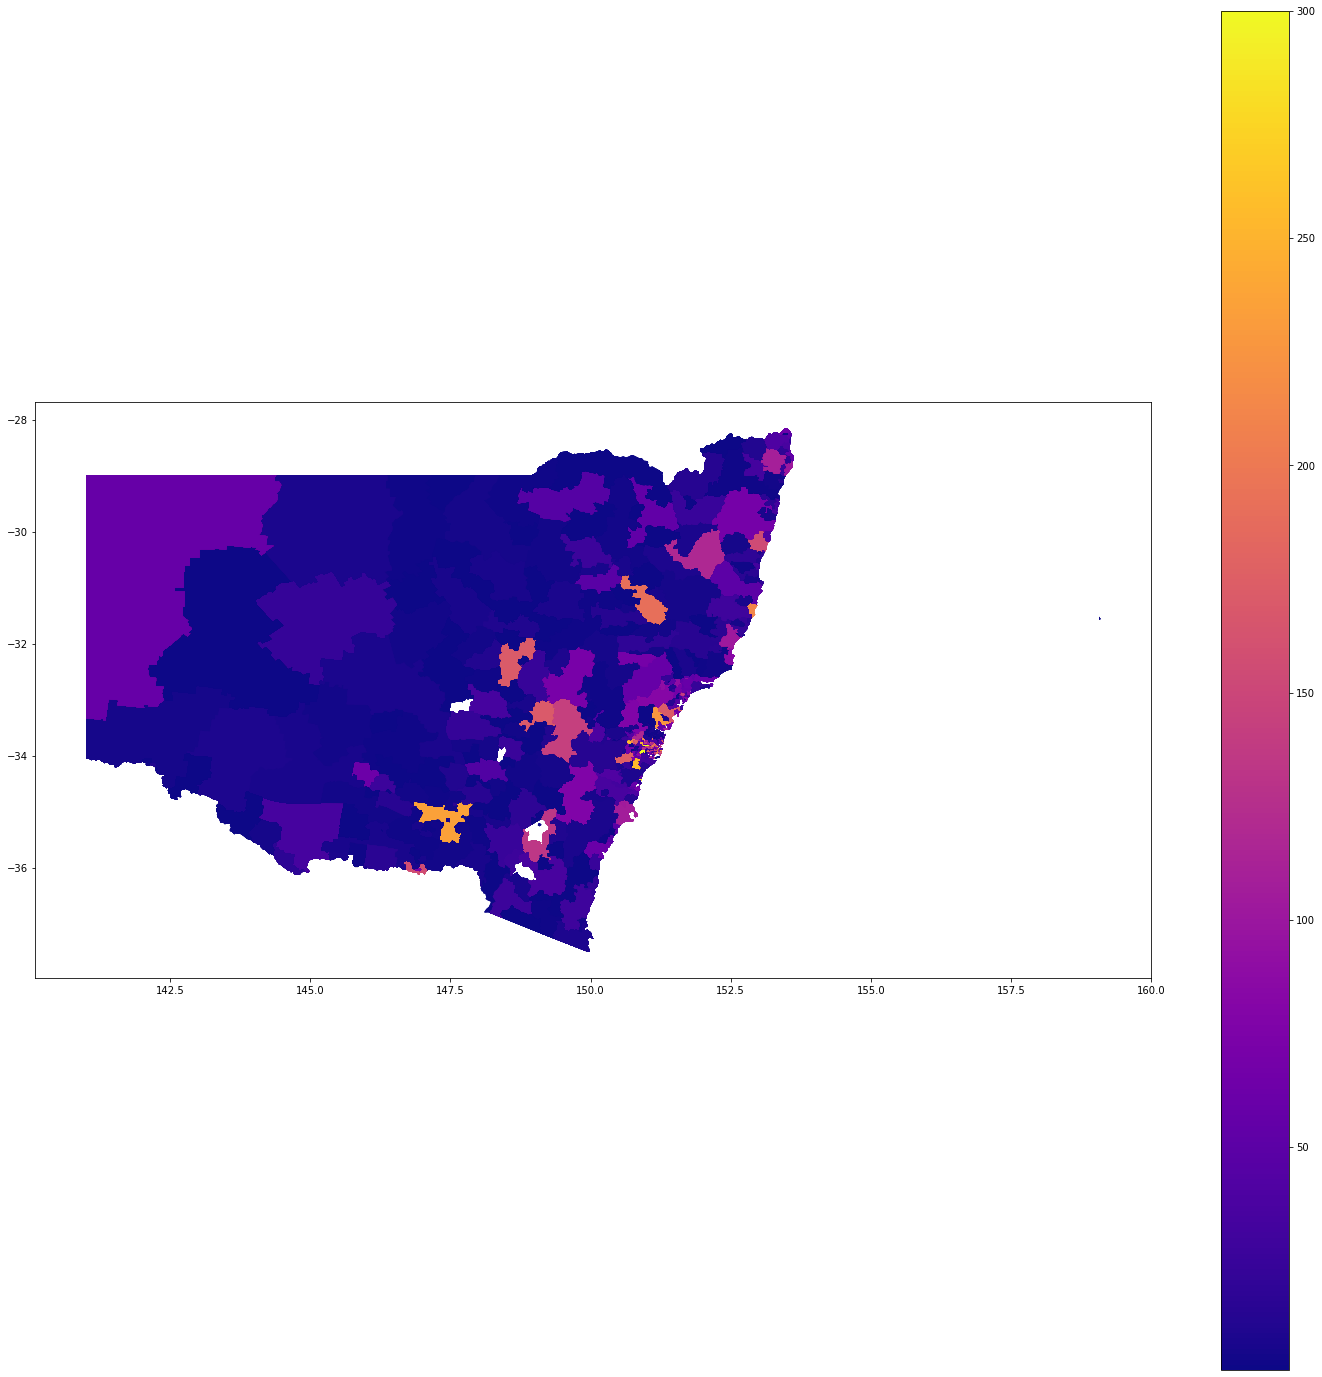

In [62]:
mean_bonds_per_year_geo[mean_bonds_per_year_geo['Year']==2019].plot(column="# of Bonds", figsize=(25,25), cmap='plasma', legend=True, vmax=300)

### 2020

<AxesSubplot:>

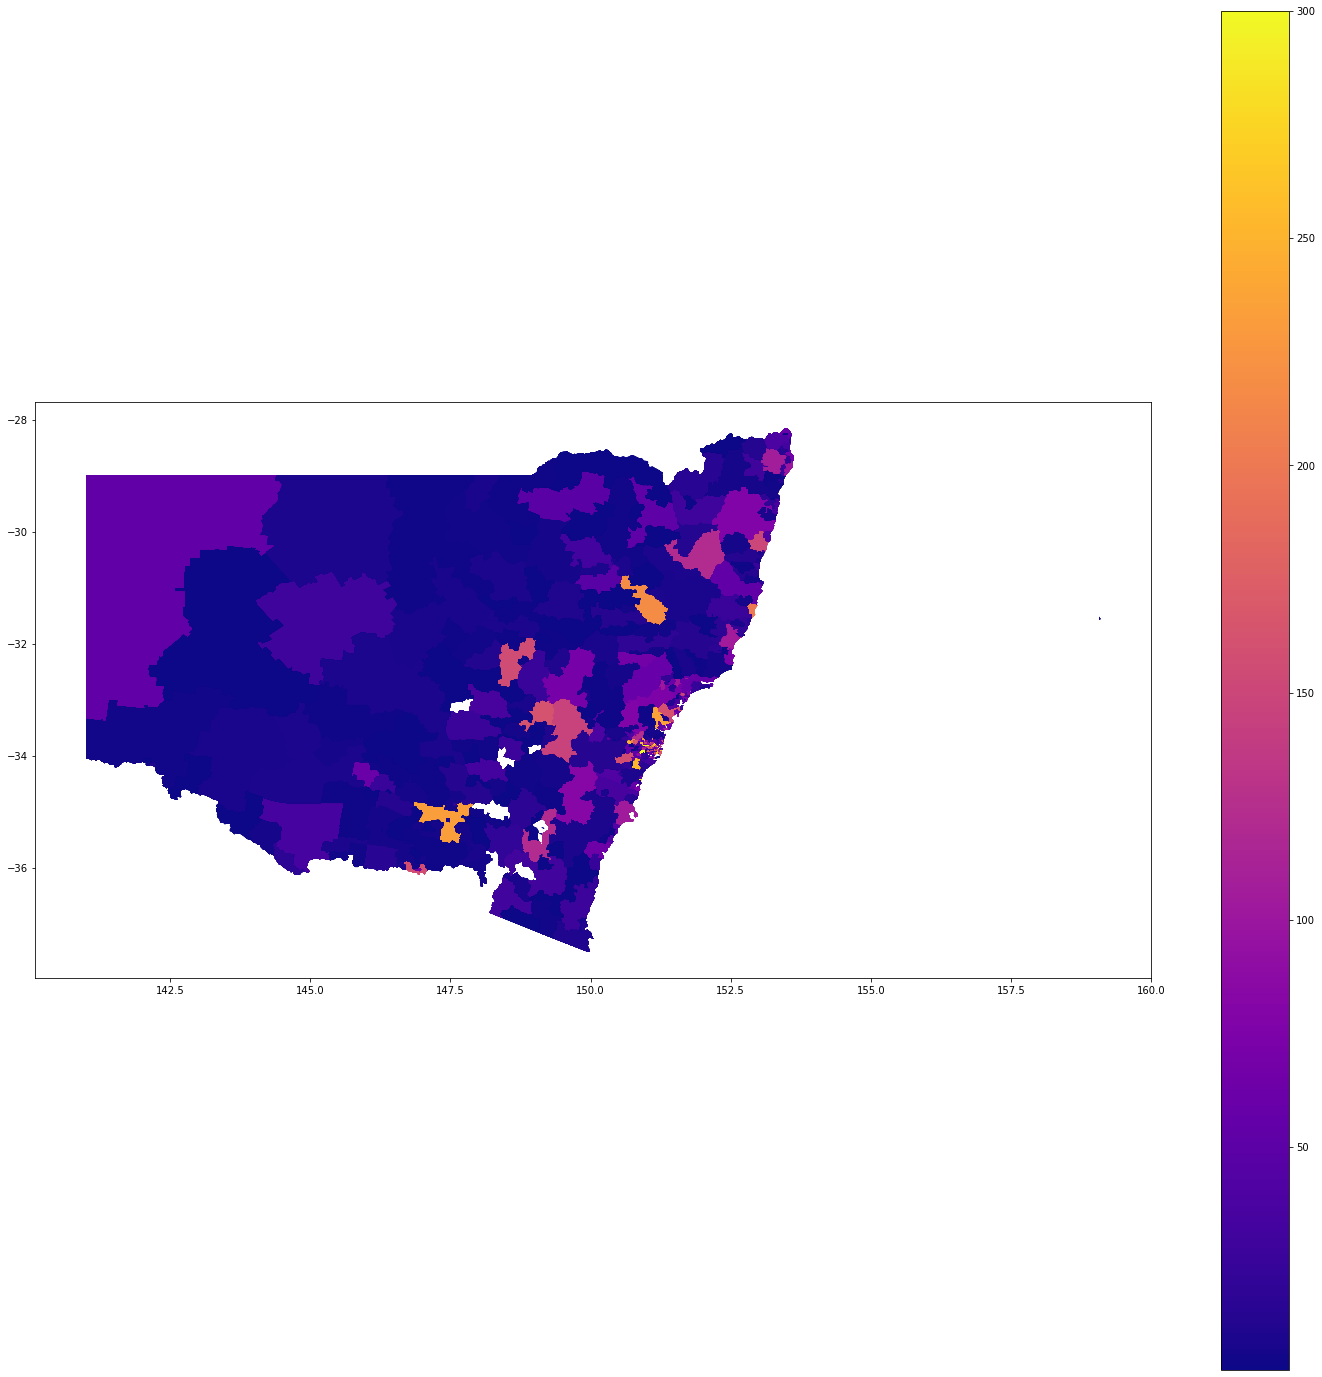

In [63]:
mean_bonds_per_year_geo[(mean_bonds_per_year_geo['Year']==2020)].plot(column="# of Bonds", figsize=(25,25), cmap='plasma', legend=True, vmax=300)

### 2021

<AxesSubplot:>

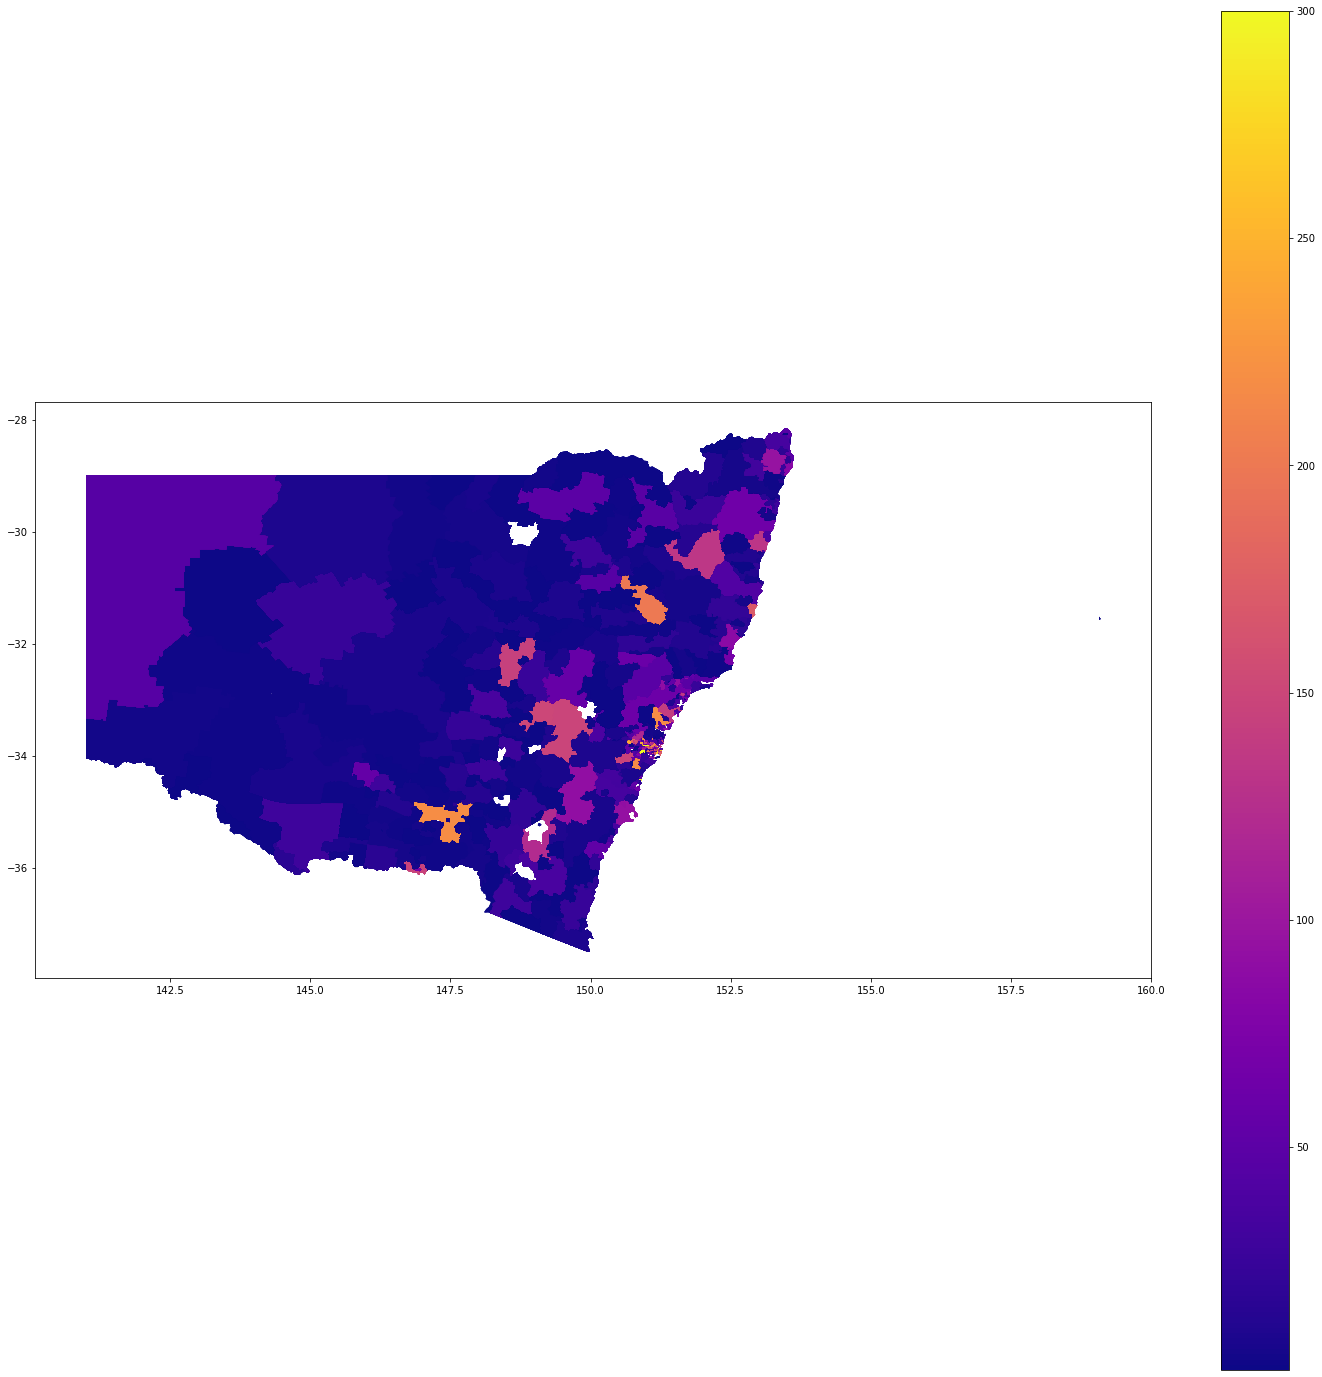

In [64]:
mean_bonds_per_year_geo[mean_bonds_per_year_geo['Year']==2021].plot(column="# of Bonds", figsize=(25,25), cmap='plasma', legend=True, vmax=300)